In [197]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

In [198]:
df = pd.read_csv("wikidata-dataset/wikidata-links.csv", header = 0)

In [199]:
df.head()

,wikidata,type,text
0,https://www.wikidata.org/wiki/Q335179,mit,Hipogrifo
1,https://www.wikidata.org/wiki/Q203480,mit,Faetonte
2,https://www.wikidata.org/wiki/Q36,place,Polonia
3,https://www.wikidata.org/wiki/Q129866,mit,monstruo de su laberinto
4,https://www.wikidata.org/wiki/Q16990,place,Etna


In [200]:
# Groupby by type
types = df.groupby("type")

# Summary statistic of all types
types.describe().head()

wikidata                                                      text  \
          count unique                                     top freq count   
type                                                                        
event         9      8  https://www.wikidata.org/wiki/Q1503611    2     9   
mit         614    156      https://www.wikidata.org/wiki/Q825  189   614   
org           1      1   https://www.wikidata.org/wiki/Q756910    1     1   
person       83     56   https://www.wikidata.org/wiki/Q118992    8    83   
place       336    138       https://www.wikidata.org/wiki/Q29   30   336   

                                     
       unique              top freq  
type                                 
event       9  concilio Niceno    1  
mit       228             Dios  188  
org         1        Calatrava    1  
person     60         MENANDRO    5  
place     141           España   30

In [201]:
types.size().sort_values(ascending=False).head()

type
mit       614
place     336
person     83
event       9
org         1
dtype: int64

In [202]:
df.dtypes

wikidata    object
type        object
text        object
dtype: object

## Combining text

In [203]:
print(df['text'])
text = ' '.join(df['text'].astype(str))
print ("There are {} words in the combination of all review.".format(len(text)))
#print(text)

0                      Hipogrifo
1                       Faetonte
2                        Polonia
3       monstruo de su laberinto
4                           Etna
                  ...           
1040                        Dios
1041                       Circe
1042                    Valencia
1043                       Jesús
1044                        Dios
Name: text, Length: 1045, dtype: object
There are 8104 words in the combination of all review.


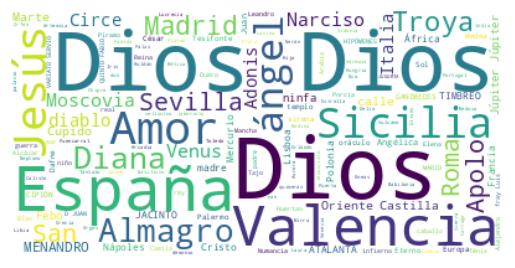

In [204]:
# Create stopword list:
stopwords = set(stopwords.words('spanish')) 
stopwords.update(["Jesú"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()